In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy 
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
# clean up from from prec_wt_SMYLE.ipynb for Erin

In [3]:
proj = ccrs.PlateCarree()

def ax_coastlines_country(ax_s):
    ax_s.coastlines(linewidths=0.5)
    ax_s.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_countries',
                                           scale='10m',
                                           facecolor='none',
                                           edgecolor='black',
                                           linewidth=0.2))
 

def plot_prec_12(prec, min_v, max_v, n_lev, cmap_s, colorbar_ori, title_s):
    '''
    prec(12,nlat, nlon): 3d variable to plot
    colorbar_ori: colorbar orientation, verticle or horizontal
    title_s: the common title for subplot
    '''
    fig = plt.figure(figsize=(18,13))
    
    cnlevel = np.linspace(min_v, max_v, num=n_lev)
  
    for col in range(12):
        ax_s = plt.subplot(4, 3, col+1, projection=proj)
        ax_coastlines_country(ax_s)
        ax_s.add_feature(cfeature.STATES, linestyle=':')
        ax_s.add_feature(cartopy.feature.OCEAN,zorder=100, edgecolor='k')
 
        mem = col + 1

        im=prec[col].plot.contourf(
            levels=cnlevel,
            cmap=cmap_s,
            ax=ax_s,
            transform=proj,
            add_colorbar=False)
        
        plt.title('WT' + str(mem),fontweight="bold", size=15)

    # single title for All the Subplot
    fig.suptitle('member: ' + title_s, fontweight="bold", fontsize=30)
    
    fig.tight_layout()
    # The position of the bottom edge of the subplots, as a fraction of the figure height.
    #fig.subplots_adjust(bottom=0.15)

    #rect [left, bottom, width, height]
    #cbar_ax = fig.add_axes([0.2, 0.1, 0.7, 0.03])
    #fig.colorbar(im, cax=cbar_ax,orientation='horizontal')
    if colorbar_ori=="vertical":
        #rect [left, bottom, width, height]
        cbar_ax = fig.add_axes([0.99, 0.1, 0.04, 0.8])
    else:
        #rect [left, bottom, width, height]
        cbar_ax = fig.add_axes([0.2, 0.001, 0.7, 0.03])
    
    fig.colorbar(im, cax=cbar_ax, orientation=colorbar_ori)

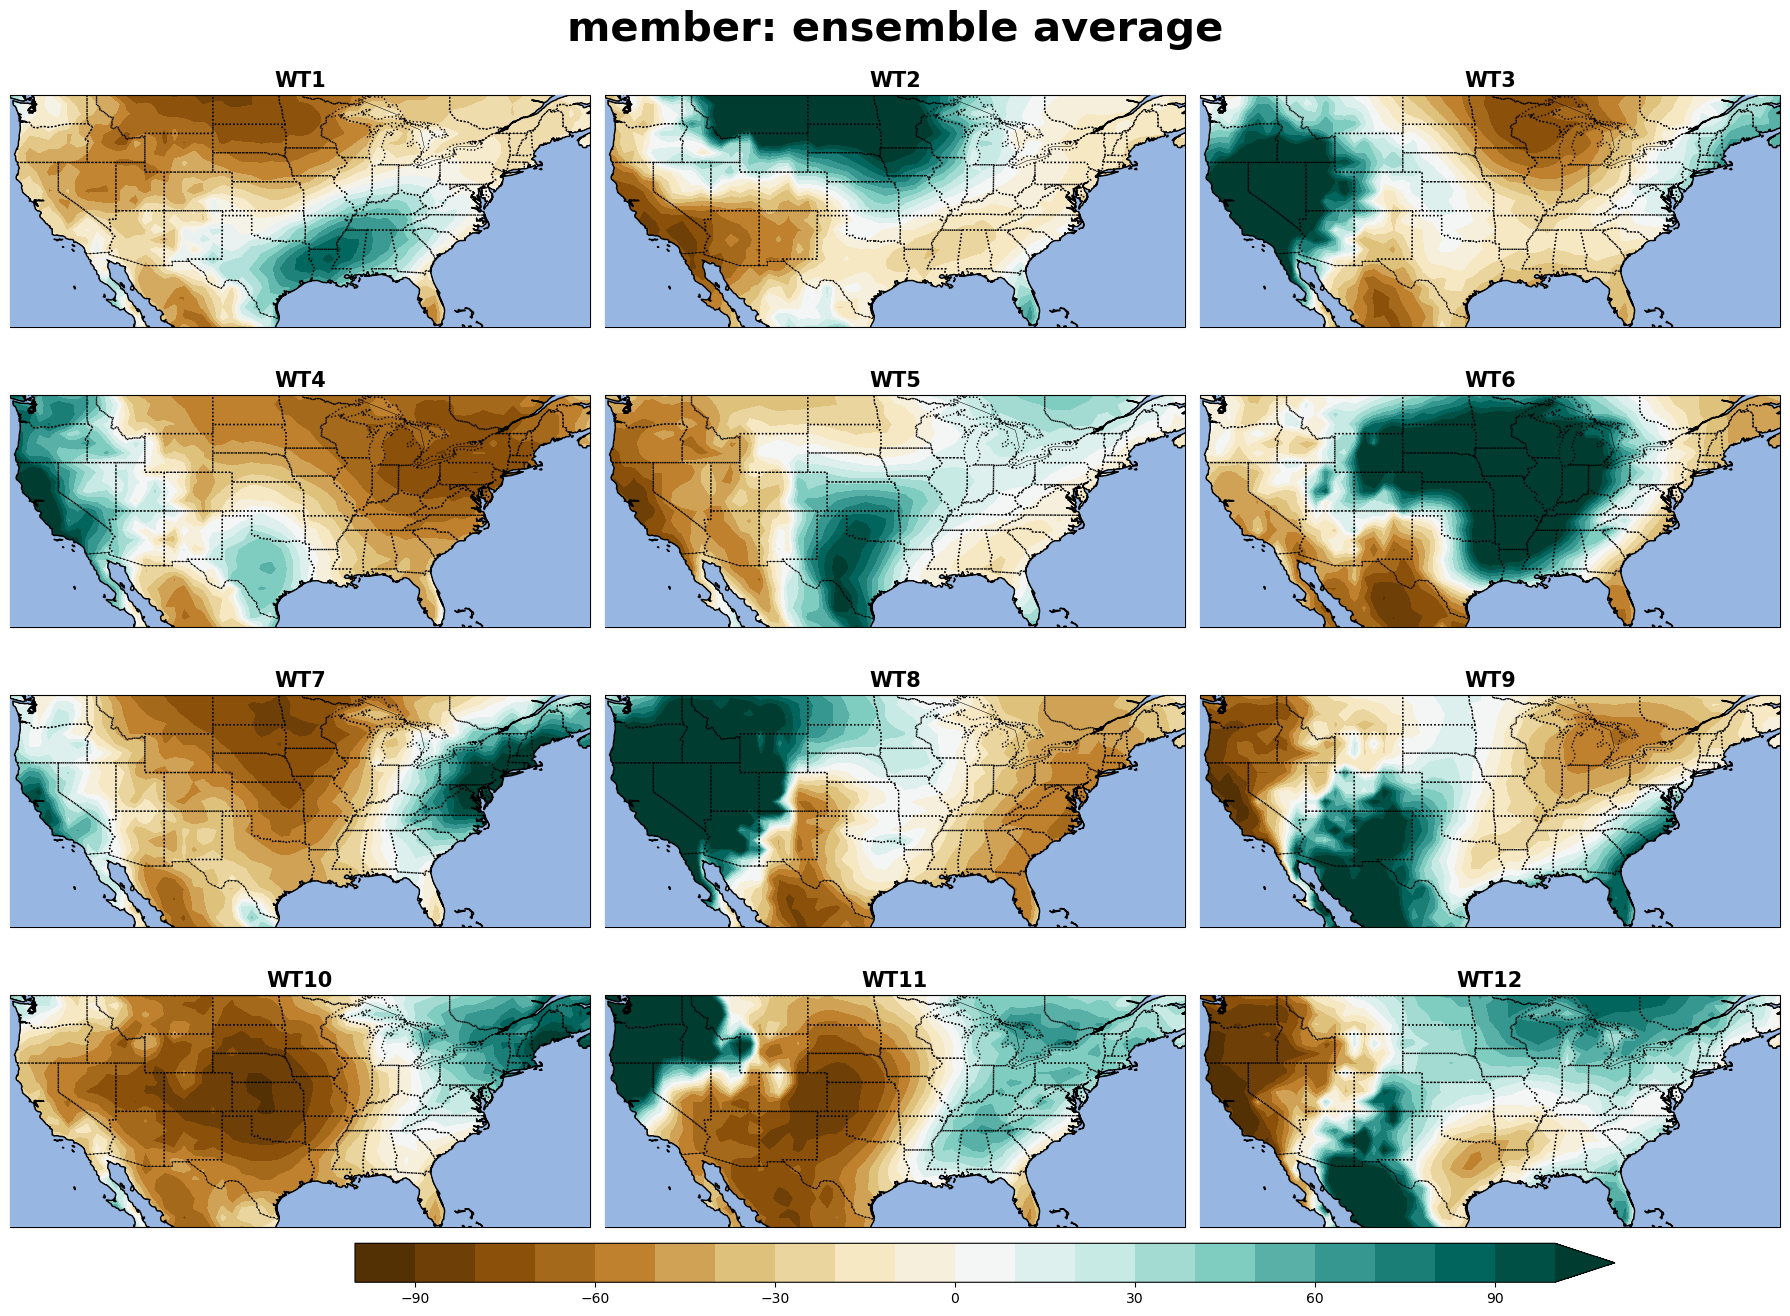

In [5]:
dir_wt = '/glade/campaign/mmm/c3we/mingge/COEXIST/ECMWF/'
for mem in range(1, 52,1):
    mem_s = str(mem).zfill(2)
    flnm_wt = dir_wt + 'prec_ano_mem' + mem_s + '.nc'
    #print(flnm_wt)
    
    with  xr.open_dataset(flnm_wt) as ds_prec:
        prec_wt = ds_prec.__xarray_dataarray_variable__*100
        if mem == 1:
            prec_avg = prec_wt.copy()
        else:
            prec_avg = prec_avg + prec_wt
prec_avg = prec_avg/51.
plot_prec_12(prec_avg, -100, 100, 21, 'BrBG', 'horizontal', 'ensemble average')